In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Show all columns
pd.set_option('max_columns', None)

In [3]:
df = pd.read_pickle(r'./../data/AtlasPreprocess.pkl')
df

,FIPS,State,County,PCT_LACCESS_POP10,PCT_LACCESS_POP15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,PCT_LACCESS_NHPI15,PCT_LACCESS_MULTIR15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,SPECSPTH11,SPECSPTH16,SNAPSPTH12,SNAPSPTH17,FFRPTH11,FFRPTH16,FSRPTH11,FSRPTH16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,PCT_SNAP12,PCT_SNAP17,SNAP_PART_RATE11,SNAP_PART_RATE16,PCT_NSLP12,PCT_NSLP17,PCT_FREE_LUNCH10,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PCT_SBP12,PCT_SBP17,PCT_SFSP12,PCT_SFSP17,FDPIR12,FDPIR15,FOOD_BANKS18,FOODINSEC_12_14,FOODINSEC_15_17,DIRSALES_FARMS07,DIRSALES_FARMS12,FMRKTPTH13,FMRKTPTH18,FOODHUB18,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
0,1001,AL,Autauga,33.769657,32.062255,9.793530,11.991125,3.284786,3.351332,4.608749,8.837112,8.460485,4.376378,3.996279,23.163613,7.726582,0.863345,0.159000,0.112092,0.016159,0.884808,0.090581,0.054271,0.018116,0.018090,0.561604,0.560802,0.018116,0.018090,0.674004,0.804747,0.615953,0.795977,0.579721,0.560802,649.511367,674.802720,484.381507,512.280987,18.908476,16.500056,84.020,86.898,68.226043,63.126590,36.116721,NaN,6.886107,NaN,27.206328,33.475354,3.160320,6.369006,0,0,0,16.8,16.3,25.0,51.0,0.018277,0.017985,NaN,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,18.8,1
1,1003,AL,Baldwin,19.318473,16.767489,5.460261,5.424427,2.147827,1.905114,1.298900,4.343199,3.844936,3.513570,3.061840,13.981393,1.942757,0.755973,0.116833,0.099662,0.008131,0.618712,0.144746,0.139753,0.032166,0.033733,0.573622,0.568650,0.107219,0.130115,0.725055,0.890836,0.648675,0.751775,1.157966,1.137300,649.511367,674.802720,484.381507,512.280987,18.908476,16.500056,84.020,86.898,68.226043,63.126590,36.761939,39.449096,5.542340,6.346384,27.206328,33.475354,3.160320,6.369006,0,0,0,16.8,16.3,80.0,103.0,0.020525,0.018347,NaN,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,19.6,1
2,1005,AL,Barbour,20.840972,22.105560,11.420316,10.739667,4.135869,4.329378,4.303147,3.425062,3.758341,2.805166,3.001695,10.302934,9.881360,1.855183,0.062266,0.145539,0.029436,1.684025,0.219370,0.155195,0.000000,0.038799,0.804358,0.737177,0.109685,0.077598,1.280590,1.424614,0.694673,0.892372,0.621549,0.543183,649.511367,674.802720,484.381507,512.280987,18.908476,16.500056,84.020,86.898,68.226043,63.126590,66.388961,63.985083,4.582140,2.317528,27.206328,33.475354,3.160320,6.369006,0,0,0,16.8,16.3,18.0,13.0,0.111342,0.160765,NaN,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,45.2,0
3,1007,AL,Bibb,4.559753,4.230324,2.144661,2.601627,3.458580,2.821427,0.676710,1.087518,1.015242,0.657008,0.600865,2.358770,1.828933,0.037516,0.008703,0.010967,0.000000,0.022951,0.263794,0.220916,0.043966,0.044183,0.835348,0.662749,0.000000,0.000000,0.719122,0.801423,0.263794,0.309283,0.219829,0.309283,649.511367,674.802720,484.381507,512.280987,18.908476,16.500056,84.020,86.898,68.226043,63.126590,53.502278,52.257676,9.253986,9.060807,27.206328,33.475354,3.160320,6.369006,0,0,0,16.8,16.3,12.0,13.0,0.044413,0.044643,NaN,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,29.3,1
4,1009,AL,Blount,2.700840,6.497380,1.062468,2.880150,3.269380,3.336414,0.812727,0.671490,1.588720,0.340269,0.882583,5.909147,0.167201,0.867886,0.014705,0.050484,0.001854,0.353990,0.121608,0.086863,0.017373,0.017373,0.521177,0.469059,0.017373,0.000000,0.657144,0.692374,0.347451,0.399569,0.260589,0.208471,649.511367,674.802720,484.381507,512.280987,18.908476,16.500056,84.020,86.898,68.226043,63.126590,43.931360,46.624585,8.097947,7.895581,27.206328,33.475354

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   3143 non-null   int64  
 1   State                  3143 non-null   object 
 2   County                 3143 non-null   object 
 3   PCT_LACCESS_POP10      3143 non-null   float64
 4   PCT_LACCESS_POP15      3124 non-null   float64
 5   PCT_LACCESS_LOWI10     3143 non-null   float64
 6   PCT_LACCESS_LOWI15     3123 non-null   float64
 7   PCT_LACCESS_HHNV10     3143 non-null   float64
 8   PCT_LACCESS_HHNV15     3140 non-null   float64
 9   PCT_LACCESS_SNAP15     3123 non-null   float64
 10  PCT_LACCESS_CHILD10    3143 non-null   float64
 11  PCT_LACCESS_CHILD15    3124 non-null   float64
 12  PCT_LACCESS_SENIORS10  3143 non-null   float64
 13  PCT_LACCESS_SENIORS15  3124 non-null   float64
 14  PCT_LACCESS_WHITE15    3124 non-null   float64
 15  PCT_

In [5]:
pd.set_option('max_rows', None)
df.isnull().sum()

FIPS                        0
State                       0
County                      0
PCT_LACCESS_POP10           0
PCT_LACCESS_POP15          19
PCT_LACCESS_LOWI10          0
PCT_LACCESS_LOWI15         20
PCT_LACCESS_HHNV10          0
PCT_LACCESS_HHNV15          3
PCT_LACCESS_SNAP15         20
PCT_LACCESS_CHILD10         0
PCT_LACCESS_CHILD15        19
PCT_LACCESS_SENIORS10       0
PCT_LACCESS_SENIORS15      19
PCT_LACCESS_WHITE15        19
PCT_LACCESS_BLACK15        19
PCT_LACCESS_HISP15         19
PCT_LACCESS_NHASIAN15      19
PCT_LACCESS_NHNA15         19
PCT_LACCESS_NHPI15         19
PCT_LACCESS_MULTIR15       19
GROCPTH11                   0
GROCPTH16                   0
SUPERCPTH11                 0
SUPERCPTH16                 0
CONVSPTH11                  0
CONVSPTH16                  0
SPECSPTH11                  0
SPECSPTH16                  0
SNAPSPTH12                  0
SNAPSPTH17                 27
FFRPTH11                    0
FFRPTH16                    0
FSRPTH11  

In [6]:
df.describe()

,FIPS,PCT_LACCESS_POP10,PCT_LACCESS_POP15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,PCT_LACCESS_HHNV10,PCT_LACCESS_HHNV15,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_CHILD15,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,PCT_LACCESS_WHITE15,PCT_LACCESS_BLACK15,PCT_LACCESS_HISP15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_NHNA15,PCT_LACCESS_NHPI15,PCT_LACCESS_MULTIR15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,SPECSPTH11,SPECSPTH16,SNAPSPTH12,SNAPSPTH17,FFRPTH11,FFRPTH16,FSRPTH11,FSRPTH16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,PCT_SNAP12,PCT_SNAP17,SNAP_PART_RATE11,SNAP_PART_RATE16,PCT_NSLP12,PCT_NSLP17,PCT_FREE_LUNCH10,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PCT_SBP12,PCT_SBP17,PCT_SFSP12,PCT_SFSP17,FDPIR12,FDPIR15,FOOD_BANKS18,FOODINSEC_12_14,FOODINSEC_15_17,DIRSALES_FARMS07,DIRSALES_FARMS12,FMRKTPTH13,FMRKTPTH18,FOODHUB18,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,CHILDPOVRATE15,METRO13
count,3143.000000,3143.000000,3124.000000,3143.000000,3123.000000,3143.000000,3140.000000,3123.000000,3143.000000,3124.000000,3143.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3116.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3122.000000,2854.000000,3112.000000,2854.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3080.000000,3080.000000,3140.000000,3140.000000,180.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3139.000000,3139.000000,3139.000000,3143.000000
mean,30390.411709,23.559330,23.084470,8.374953,8.651256,3.154496,3.289225,2.917896,5.505321,5.408435,3.915474,3.791364,18.976973,1.879652,2.021269,0.249350,0.804746,0.019207,1.154542,0.258088,0.243835,0.015814,0.018255,0.597443,0.595571,0.054487,0.055450,0.880064,0.918405,0.560159,0.584822,0.772666,0.775831,641.617910,599.639926,624.523725,651.969675,15.206917,12.891473,79.820916,84.001372,62.991746,59.168157,42.927235,46.274527,8.501039,7.288870,25.370144,28.204112,4.218387,4.899112,0.152720,0.159402,0.087814,14.863952,12.833726,44.416883,46.919481,0.053856,0.059385,1.222222,78.294698,8.748643,8.283674,1.136731,1.871411,0.080453,15.882540,23.419345,48611.206117,16.260975,23.238738,0.371301
std,15164.717720,20.250176,19.602745,8.214988,8.368703,3.207105,3.213497,3.160642,4.880426,4.817501,4.215192,3.967098,17.529867,4.139239,5.030497,0.693856,4.835109,0.134887,1.864479,0.226151,0.216536,0.021221,0.022460,0.315033,0.304968,0.070637,0.075095,0.387638,0.372241,0.301338,0.307703,0.594496,0.567851,96.641980,78.735909,128.070842,116.536765,3.651007,3.170320,9.203802,9.223259,9.405698,8.941700,16.264896,18.863042,3.290937,3.713097,7.711593,8.043902,2.101342,2.254617,0.966777,0.977978,0.283070,2.599730,2.194020,57.091138,63.159480,0.086989,0.100356,0.603116,19.888149,14.421441,13.190860,2.469841,7.606763,0.945576,4.190210,3.375268,12351.988288,6.442319,9.364172,0.483230
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040180,0.000000,0.000000,0.000000,0.000000,402.097804,364.112002,371.845051,439.731454,5.956719,5.668505,54.917000,56.037000,40.530547,40.200015,0.000000,0.000000,0.000000,0.000000,11.208695,10.545776,1.441894,1.035726,0.000000,0.000000,0.000000,8.400000,7.400000,0.000000,0.000000,0.000000,0.000000,1.000000,2.667918,0.000000,0.000000,0.000000,0.000000,0.000000,3.470599,0.000000,22894.000000,3.400000,3.300000,0.000000
25%,18178.000000,10

In [7]:
mis_cols =['PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_SNAP15', 'PCT_LACCESS_CHILD15',
           'PCT_LACCESS_SENIORS15', 'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15', 
           'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15', 'PCT_LACCESS_MULTIR15','SNAPSPTH17',
           'PCT_FREE_LUNCH10', 'PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH10', 'PCT_REDUCED_LUNCH15','DIRSALES_FARMS07',
           'DIRSALES_FARMS12', 'FMRKTPTH13', 'FMRKTPTH18', 'FOODHUB18', 'MEDHHINC15', 'POVRATE15', 'CHILDPOVRATE15']

C:\Users\kunse\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


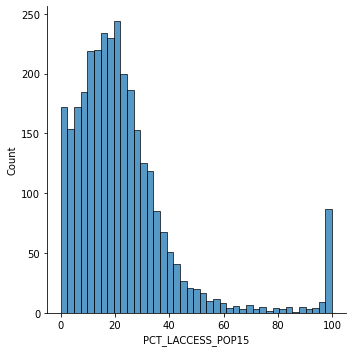

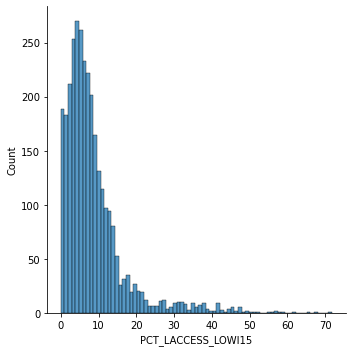

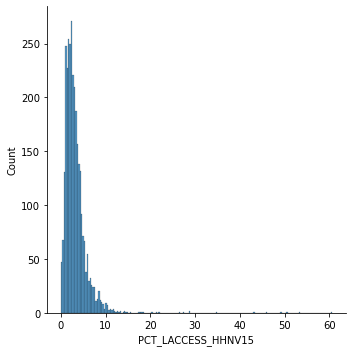

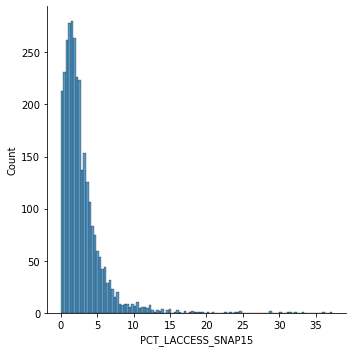

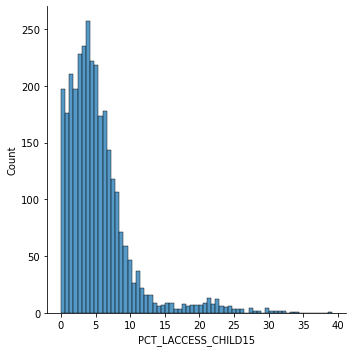

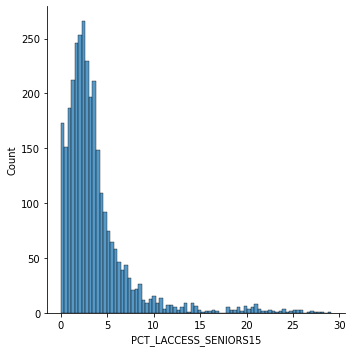

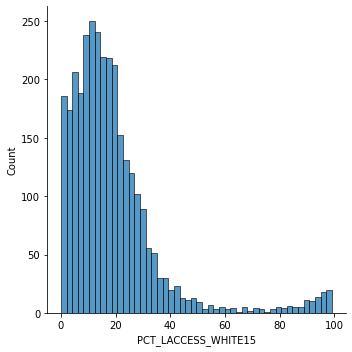

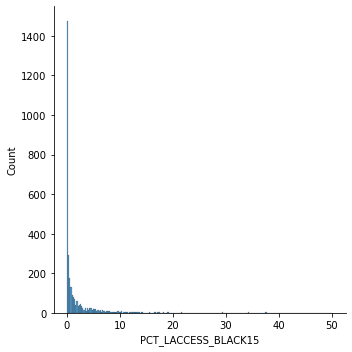

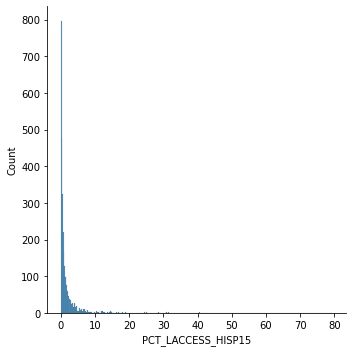

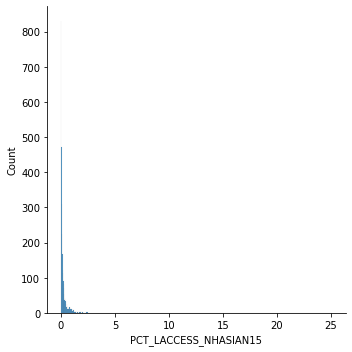

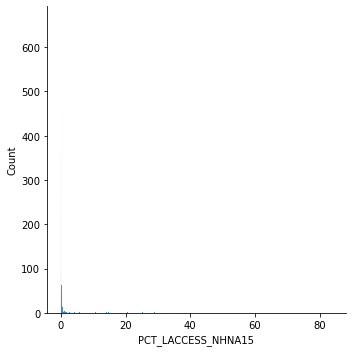

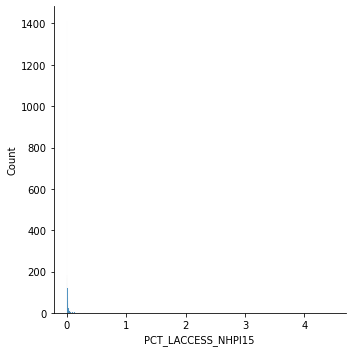

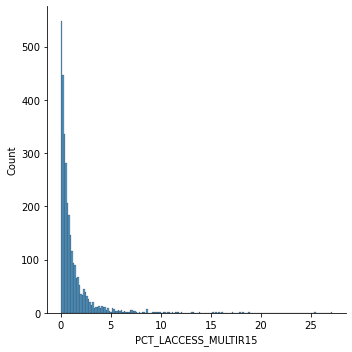

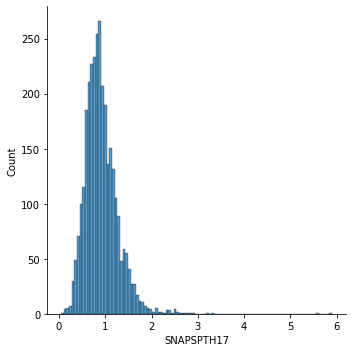

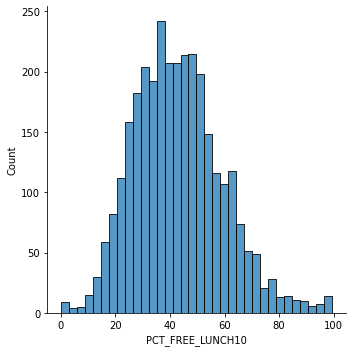

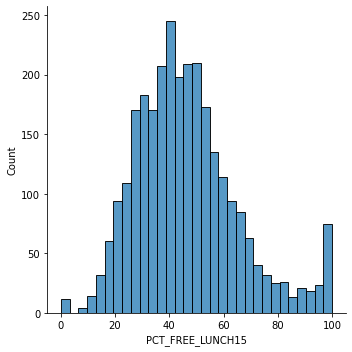

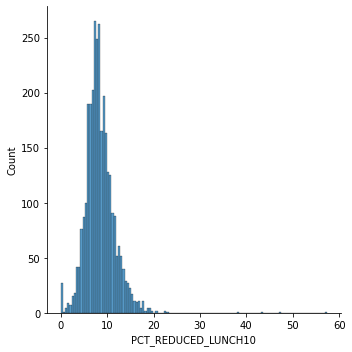

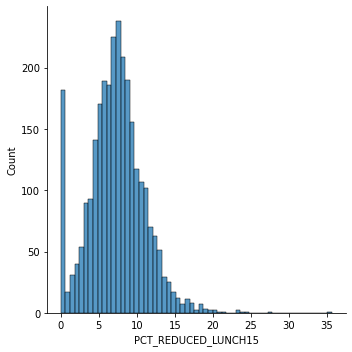

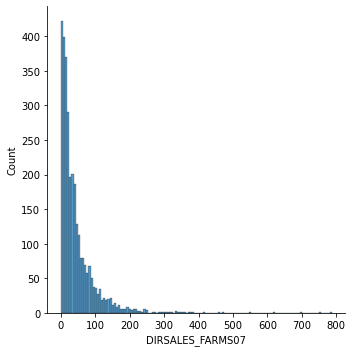

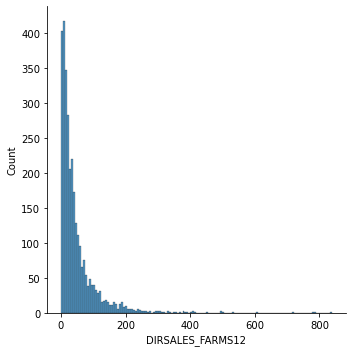

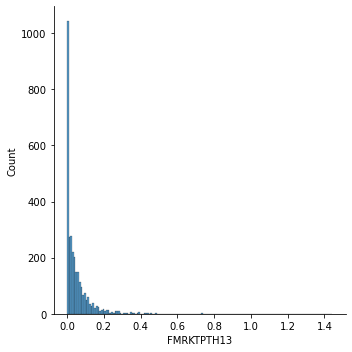

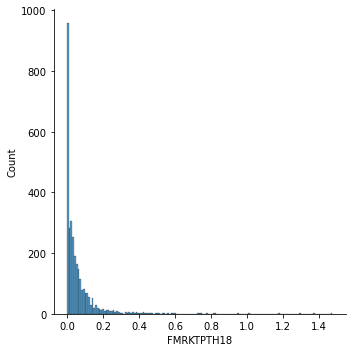

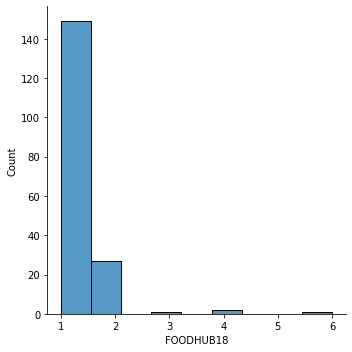

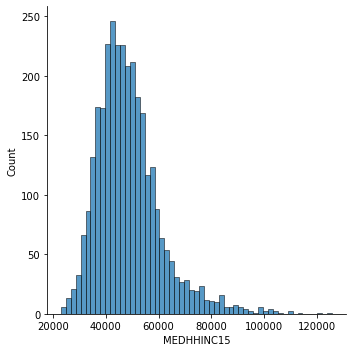

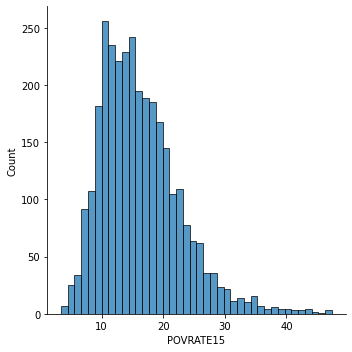

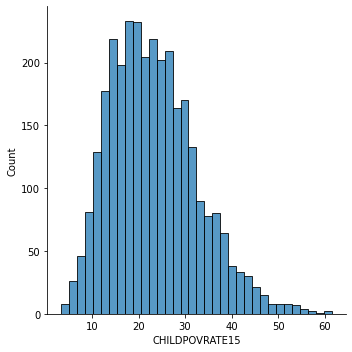

In [9]:
for c in mis_cols:
    sns.displot(data=df, x=c)
#     plt.show()

In [8]:
len(df['State'].unique())
print(df['State'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [11]:
# Fill nans with median of the column
df.fillna(df.median(), inplace=True)

In [12]:
df.isnull().sum()

FIPS                     0
State                    0
County                   0
PCT_LACCESS_POP10        0
PCT_LACCESS_POP15        0
PCT_LACCESS_LOWI10       0
PCT_LACCESS_LOWI15       0
PCT_LACCESS_HHNV10       0
PCT_LACCESS_HHNV15       0
PCT_LACCESS_SNAP15       0
PCT_LACCESS_CHILD10      0
PCT_LACCESS_CHILD15      0
PCT_LACCESS_SENIORS10    0
PCT_LACCESS_SENIORS15    0
PCT_LACCESS_WHITE15      0
PCT_LACCESS_BLACK15      0
PCT_LACCESS_HISP15       0
PCT_LACCESS_NHASIAN15    0
PCT_LACCESS_NHNA15       0
PCT_LACCESS_NHPI15       0
PCT_LACCESS_MULTIR15     0
GROCPTH11                0
GROCPTH16                0
SUPERCPTH11              0
SUPERCPTH16              0
CONVSPTH11               0
CONVSPTH16               0
SPECSPTH11               0
SPECSPTH16               0
SNAPSPTH12               0
SNAPSPTH17               0
FFRPTH11                 0
FFRPTH16                 0
FSRPTH11                 0
FSRPTH16                 0
PC_FFRSALES07            0
PC_FFRSALES12            0
P

C:\Users\kunse\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


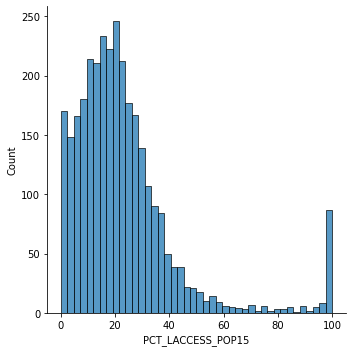

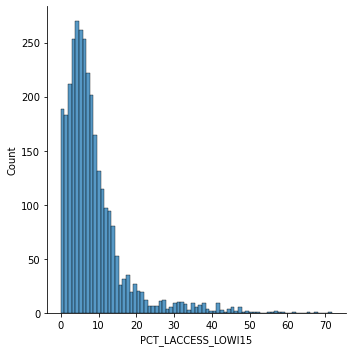

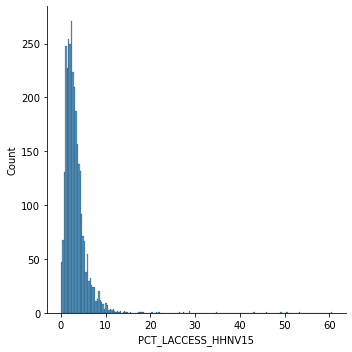

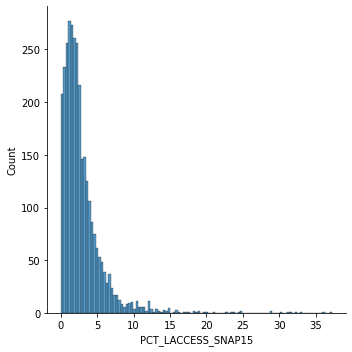

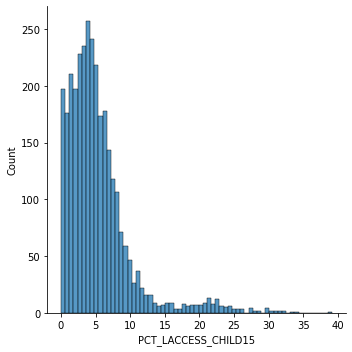

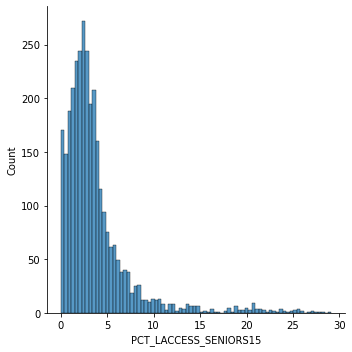

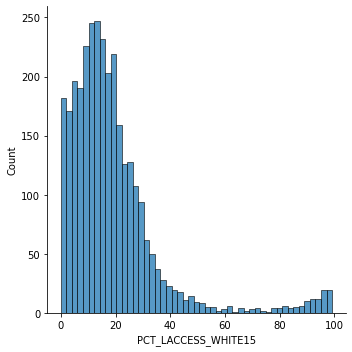

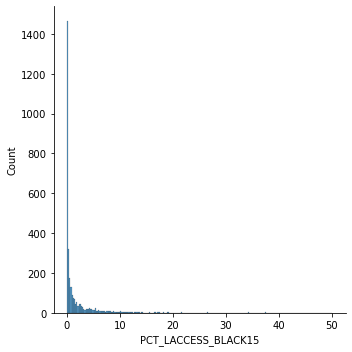

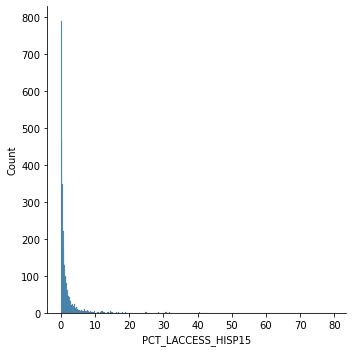

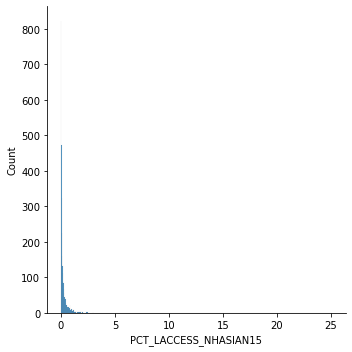

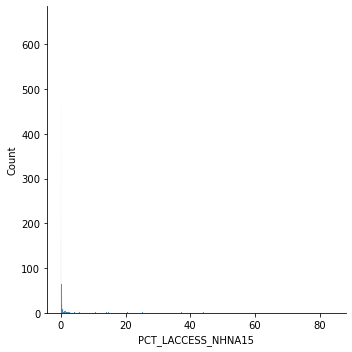

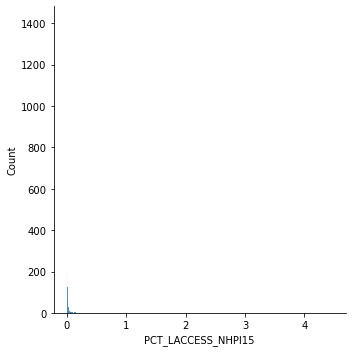

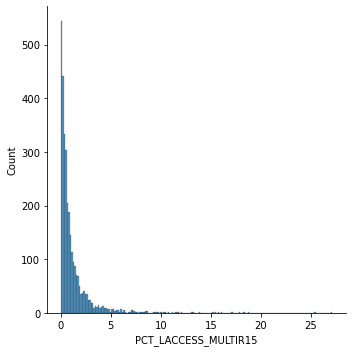

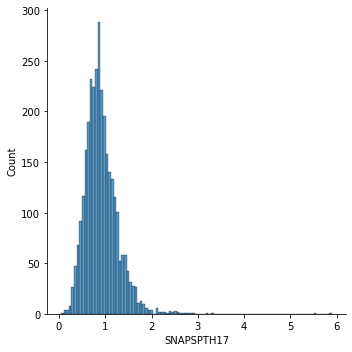

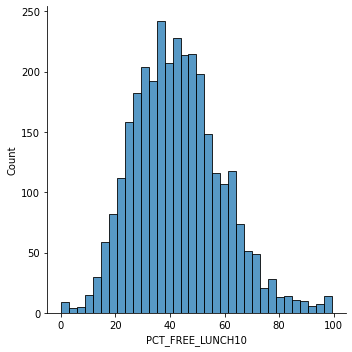

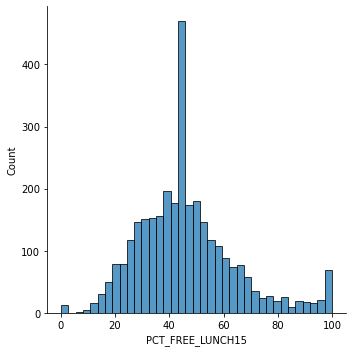

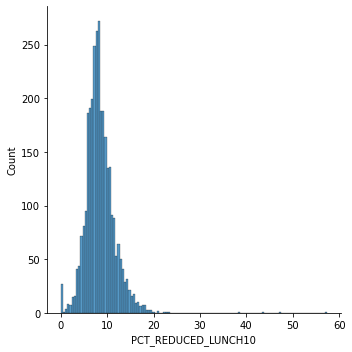

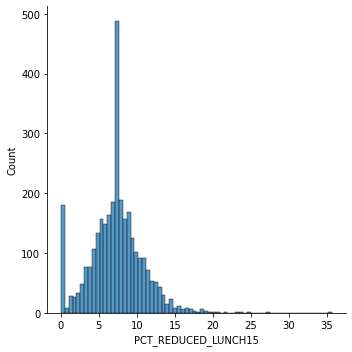

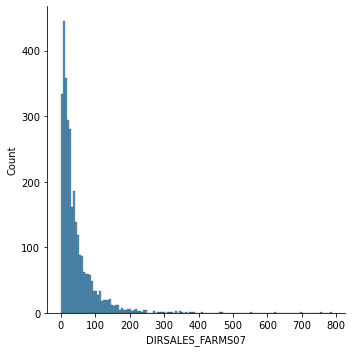

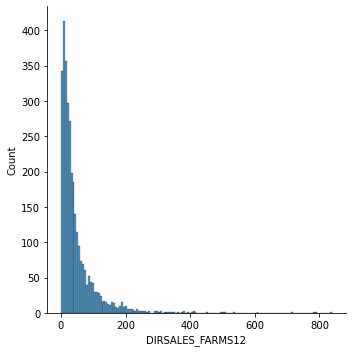

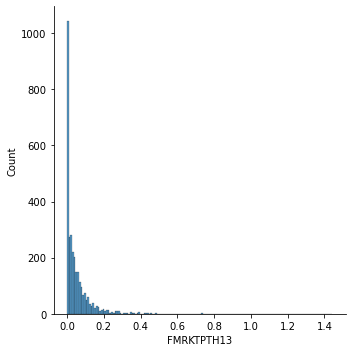

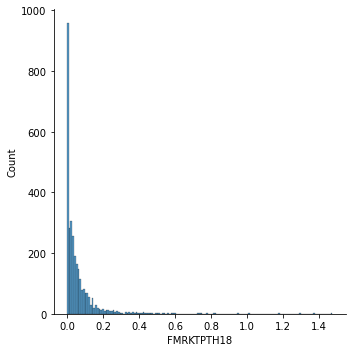

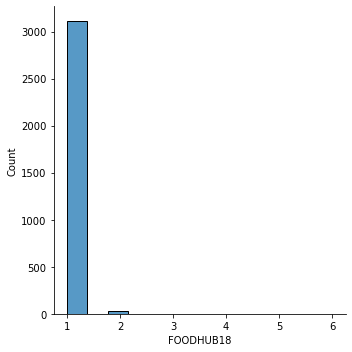

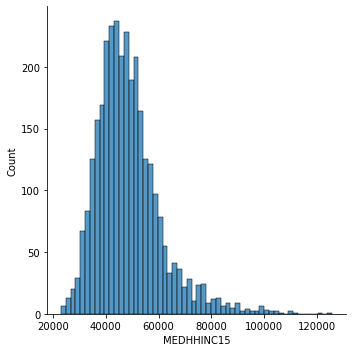

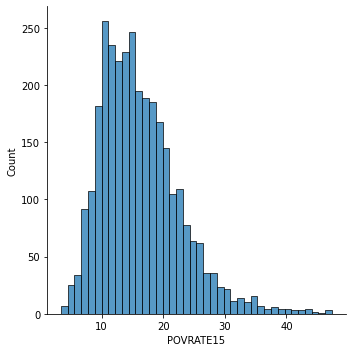

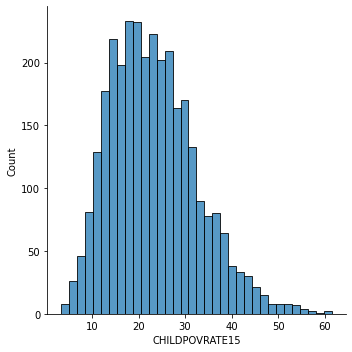

In [13]:
for c in mis_cols:
    sns.displot(data=df, x=c)
#     plt.show()

In [12]:
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData['id'] = geoData['id'].astype(str).astype(int)

# Remove Puerto Rico.
rem_state = ['72']
geoData = geoData[~geoData['STATE'].isin(rem_state)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4))

ModuleNotFoundError: No module named 'geoplot'

In [ ]:
# import plotly.figure_factory as ff
import mapclassify as mc

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
scheme = mc.Quantiles(df['PCT_LACCESS_POP10'], k=10)

# Map
gplt.choropleth(df, 
    hue="PCT_LACCESS_POP10", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Low Access % pop 2010', fontsize=13)